<h4><center>Koren Abitbul, Pan Eyal</center></h4>

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

Loading the Data

In [3]:
data = pd.read_pickle("ass3.pickle")

train = data['train']
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

dev = data['dev']
X_dev = dev.iloc[:, :-1].values
y_dev = dev.iloc[:, -1].values

test = data['test']
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

## Preliminary Data Analysis

Printing some statistics about the data.
In addition, We can observe that the different features have different counts from the 'target', which has 12384 labels. This suggests that there might be some missing data in the other features. In order to fix that we replace any NaN values with the mean of the non-missing values using np.nanmean().


In [4]:
import seaborn as sns
# Get the shape of the training set
print("The shape of the train data: ", X_train.shape)
# Summary statistics of the training set
print(train.describe().round(2), "\n")

The shape of the train data:  (12384, 8)
             f0        f1        f2        f3        f4        f5        f6  \
count  12210.00  12244.00  12226.00  12228.00  12215.00  12242.00  12233.00   
mean       3.87     28.63      5.42      1.10   1426.83      3.14     35.63   
std        1.92     12.57      2.38      0.47   1103.53     13.44      2.13   
min        0.50      1.00      0.85      0.50      3.00      0.69     32.55   
25%        2.56     18.00      4.43      1.01    786.00      2.43     33.94   
50%        3.53     29.00      5.22      1.05   1170.00      2.82     34.25   
75%        4.75     37.00      6.04      1.10   1739.00      3.28     37.71   
max       15.00     52.00    132.53     34.07  28566.00   1243.33     41.95   

             f7    target  
count  12236.00  12384.00  
mean    -119.56      2.07  
std        2.00      1.15  
min     -124.35      0.15  
25%     -121.79      1.20  
50%     -118.49      1.80  
75%     -118.02      2.65  
max     -114.55      5.

Handle any NaN values with np.nanmean():

In [5]:
nan_indices = np.isnan(X_train)
X_train[nan_indices] = np.nanmean(X_train)

nan_indices = np.isnan(X_dev)
X_dev[nan_indices] = np.nanmean(X_dev)

nan_indices = np.isnan(X_test)
X_test[nan_indices] = np.nanmean(X_test)

## Visualize the correlation matrix
we can see the correlation between the features

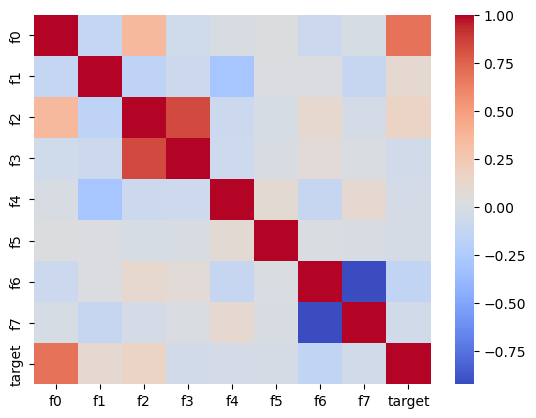

In [6]:
# Calculate the correlation matrix
correlation_matrix = train.corr()
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

## Method grid search
We evaluate the performance of various classification methods and different parameter settings by assessing their results on the validation set. Subsequently, we select the best method based on the outcomes obtained from the validation set.

In [7]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

best_from_each = []

In [8]:
# Define the models and their respective hyperparameters to search
models = {
    'Gaussian Process Regressor': (GaussianProcessRegressor(), {}),
    'Passive Aggressive Regressor': (PassiveAggressiveRegressor(), {}),
    'Linear Regression': (LinearRegression(), {}),
    'Bayesian Ridge': (BayesianRidge(), {}),
    'Elastic Net': (ElasticNet(), {}),
    'Ridge': (Ridge(), {}),
    'Lasso': (Lasso(), {}),
    'Gradient Boosting Regressor': (GradientBoostingRegressor(), {}),
    'Random Forest Regressor': (RandomForestRegressor(), {}),
    'Ada Boost Regressor': (AdaBoostRegressor(), {}),
    'KNeighbors Regressor': (KNeighborsRegressor(), {}),
    'Decision Tree Regressor': (DecisionTreeRegressor(), {}),
    'SVR': (SVR(), {})
}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    print(f"current search: {model_name}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_dev)
    mse = mean_squared_error(y_dev, y_pred)
    best_from_each.append((model, mse))
    print(f"ended with MSE: {mse}\n")

current search: Gaussian Process Regressor
ended with MSE: 5.200895993098874

current search: Passive Aggressive Regressor
ended with MSE: 3.54743189895901

current search: Linear Regression
ended with MSE: 1.2820407694052791

current search: Bayesian Ridge
ended with MSE: 1.2831892785668426

current search: Elastic Net
ended with MSE: 1.2915457380890611

current search: Ridge
ended with MSE: 1.2820407746522897

current search: Lasso
ended with MSE: 1.2987485168715187

current search: Gradient Boosting Regressor
ended with MSE: 0.2952153389845998

current search: Random Forest Regressor
ended with MSE: 0.2741390983772256

current search: Ada Boost Regressor
ended with MSE: 0.8591539602168555

current search: KNeighbors Regressor
ended with MSE: 1.1694616955386832

current search: Decision Tree Regressor
ended with MSE: 0.5740574992921996

current search: SVR
ended with MSE: 1.3666190662901982



## Best Founded Method

In [9]:
best_model = min(best_from_each, key=lambda x: x[1])[0]
print(f'Best model is: {best_model}')

Best model is: RandomForestRegressor()


In order to evaluate our models, we computed the mse on each of them with the Dev data.

We can explain that random forest recieved the highest score from the following reasons:

* Random Forests are known for their ability to handle complex relationships and interactions between features.
* Random Forests are robust to noisy data and outliers. Since the algorithm builds multiple trees by randomly selecting subsets of features and data points, it can effectively mitigate the impact of noisy observations or outliers in the dataset.

## Additional hyper parameter grid search

* n_estimators: This hyperparameter determines the number of decision trees in the Random Forest. Increasing n_estimators can improve the model's accuracy up to a certain point. Adding more trees allows the ensemble to capture a more comprehensive range of patterns and reduce overfitting.

* max_depth: The max_depth hyperparameter controls the maximum depth allowed for each decision tree in the Random Forest. Increasing max_depth can lead to more complex trees that can potentially capture more intricate relationships in the data. However, deeper trees can also increase the risk of overfitting, especially if the dataset is small or noisy. Setting max_depth to None (the default) allows the trees to expand until all leaves are pure or until all leaves contain fewer samples than min_samples_split.

* min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node in a decision tree. Increasing min_samples_split can prevent the trees from growing excessively complex and reduce overfitting. By requiring a larger number of samples for a split, the algorithm will only consider splits that have a sufficient amount of data, promoting generalization. However, setting min_samples_split to a higher value may also lead to underfitting if the dataset is too small.

In [10]:
best_mse = np.inf
best_hyper_param = [-1,-1,-1]

for ne in [50, 100, 200]:
    for md in [None, 5, 10, 15, 20]:
        for mss in [2, 5, 10]:
            model = RandomForestRegressor(n_estimators=ne, max_depth=md, min_samples_split=mss)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_dev)
            mse = mean_squared_error(y_dev, y_pred)
            if best_mse > mse:
                best_model = model
                best_mse = mse
                best_hyper_param = [ne, md, mss]

print("Best Hyperparameters:", best_hyper_param)
print("Best MSE:", best_mse)

Best Hyperparameters: [200, None, 2]
Best MSE: 0.269892050518532


## Final result
results on the test set

In [11]:
model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
real_mse = mean_squared_error(y_test, y_pred)
print(f'Real test mse is: {real_mse}')

Real test mse is: 0.26741025717721933
